In [2]:
# Firstly, some necessary imports

# Jupyter notebook related
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Built-in modules
import pickle
import sys
import os
import datetime
import itertools
from enum import Enum

# Basics of Python data handling and visualization
import numpy as np
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from shapely.geometry import Polygon
from tqdm import tqdm_notebook as tqdm
            
# Machine learning 
import lightgbm as lgb
import joblib
#from sklearn.externals import joblib
from sklearn import metrics
from sklearn import preprocessing

# Imports from eo-learn and sentinelhub-py
from eolearn.core import EOTask, EOPatch, LinearWorkflow, FeatureType, OverwritePermission, \
    LoadFromDisk, SaveToDisk, EOExecutor
from eolearn.io import S2L1CWCSInput, ExportToTiff
from eolearn.mask import AddCloudMaskTask, get_s2_pixel_cloud_detector, AddValidDataMaskTask
from eolearn.geometry import VectorToRaster, PointSamplingTask, ErosionTask
from eolearn.features import LinearInterpolation, SimpleFilterTask
from sentinelhub import BBoxSplitter, BBox, CRS, CustomUrlParam

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Dimension of the area is 50871 x 36009 m2


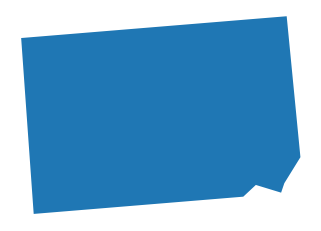

In [15]:
# Folder where data for running the notebook is stored
DATA_FOLDER = 'C:\data'

# Load geojson file
area = gpd.read_file(os.path.join(DATA_FOLDER, 'Drummond.geojson'))

# Convert CRS to UTM_18N
area_crs = CRS.UTM_18N
area = area.to_crs(crs={'init': CRS.ogc_string(area_crs)})

# Get the area shape in polygon format
area_shape = area.geometry.values.tolist()[-1]

# Plot area
area.plot()
plt.axis('off');

# Print size 
print('Dimension of the area is {0:.0f} x {1:.0f} m2'.format(area_shape.bounds[2] - area_shape.bounds[0],
                                                             area_shape.bounds[3] - area_shape.bounds[1]))